# Introduction

##### Welcome to the Exploratory Data Analysis (EDA) of the McDonald's Menu dataset. This project, conducted during my internship at Oasis Infobyte, delves into the nutritional details of various McDonald's menu items, encompassing 24 features such as calories, fat, protein, and sugar. Through meticulous data cleaning, visualization, and statistical analysis, this EDA aims to uncover insights into the nutritional composition, aiding in informed dietary decisions and consumer awareness. Let's dive into the data to better understand what we're consuming.







##### In the following sections, you'll find a detailed analysis of the McDonald's Menu dataset. We'll start by importing the dataset and proceed with data cleaning to ensure accuracy. Next, we'll conduct an exploratory data analysis (EDA) to uncover key insights, followed by visualizations to represent the nutritional information effectively. Finally, we'll conclude with a summary of our findings and provide recommendations based on the analysis.







# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
# Load the data
df = pd.read_csv('menu.csv')

# Display the first few rows of the dataset
print(df.head())

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

# Data Cleaning

let's perform some basic data cleaning tasks

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


there are no missing values in your dataset. The next steps are to verify the data types and remove any duplicates if they exist.

Let's check the data types of each column to ensure they are appropriate for analysis

In [4]:
data_types = df.dtypes
print(data_types)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


The data types appear to be mostly appropriate for analysis. The only column that might require some attention is Serving Size, which is currently a string (object). Depending on our analysis, we might need to parse the serving size into more useful numerical components (e.g., separate weight and unit).

### Remove Duplicates

In [5]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [6]:
# Calculate and display descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

### Identify Outliers

In [7]:
# Identify outliers using the IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outliers[column] = len(outlier_indices)
    return outliers

# Detect outliers
outliers = detect_outliers(df)
print("Number of outliers in each numerical column:")
print(outliers)

Number of outliers in each numerical column:
{'Calories': 6, 'Calories from Fat': 4, 'Total Fat': 4, 'Total Fat (% Daily Value)': 4, 'Saturated Fat': 0, 'Saturated Fat (% Daily Value)': 0, 'Trans Fat': 56, 'Cholesterol': 18, 'Cholesterol (% Daily Value)': 18, 'Sodium': 5, 'Sodium (% Daily Value)': 5, 'Carbohydrates': 17, 'Carbohydrates (% Daily Value)': 16, 'Dietary Fiber': 0, 'Dietary Fiber (% Daily Value)': 4, 'Sugars': 4, 'Protein': 3, 'Vitamin A (% Daily Value)': 17, 'Vitamin C (% Daily Value)': 46, 'Calcium (% Daily Value)': 2, 'Iron (% Daily Value)': 2}


### Visualizing the Outliers

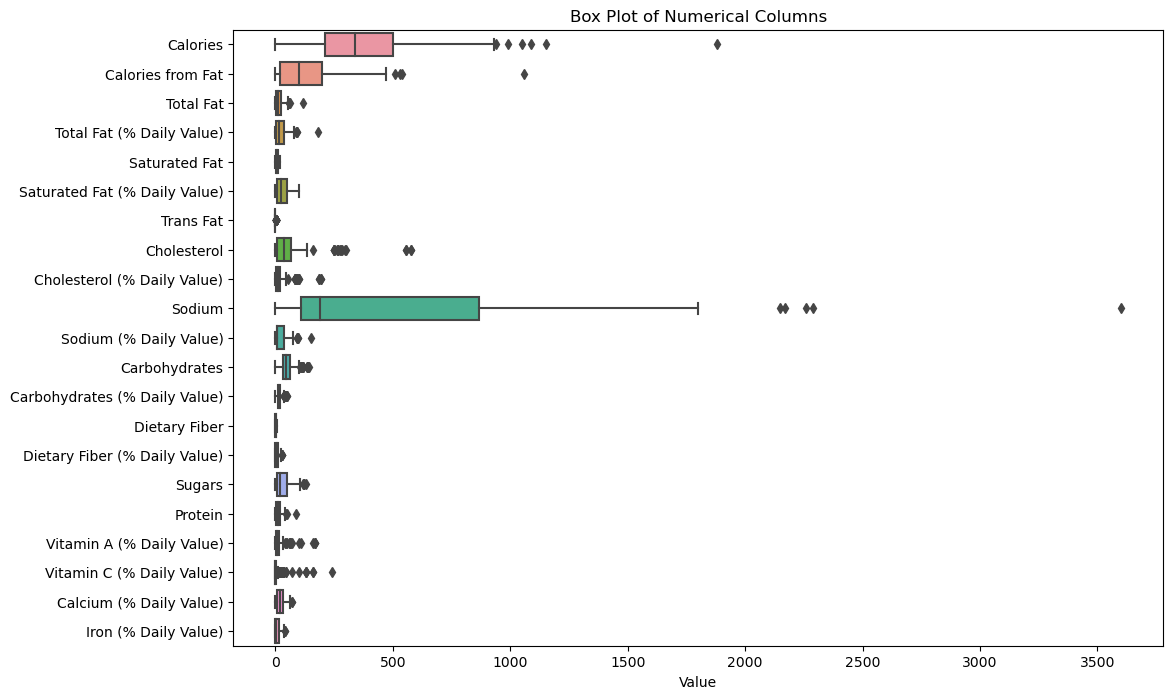

In [8]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Create box plots
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']), orient='h')

# Set plot title and labels
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Value')

plt.show()

##### The box plot illustrates the distribution of various nutritional metrics across McDonald's menu items. While the majority of values fall within the expected range, several outliers extend beyond typical limits.

##### Notably, outliers are observed in several key nutritional categories. For instance, a subset of menu items exhibits exceptionally high values for "Trans Fat", "Cholesterol", "Vitamin A (% Daily Value)", and "Vitamin C (% Daily Value)". These outliers may represent specialty items or unique offerings that deviate significantly from the norm.

##### It's important to consider the context of these outliers. For instance, while high levels of certain nutrients like "Trans Fat" and "Cholesterol" may raise concerns from a health perspective, they could also be attributed to specific menu items designed to meet diverse customer preferences.

##### By visualizing these outliers, we gain valuable insights into the breadth and diversity of McDonald's menu offerings. However, further investigation may be warranted to understand the rationale behind these extreme values and their implications for nutritional content and customer choices.

# Analysis 1: Nutritional Analysis by Category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10136\693818824.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_nutrition = df.groupby('Category').mean()


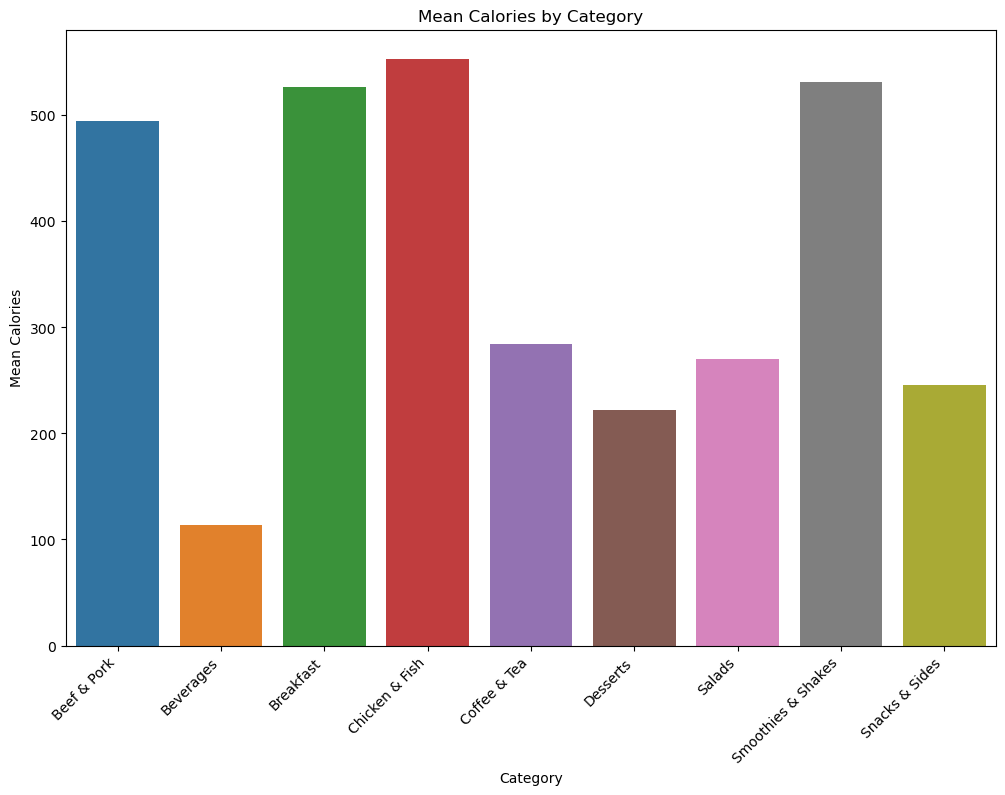

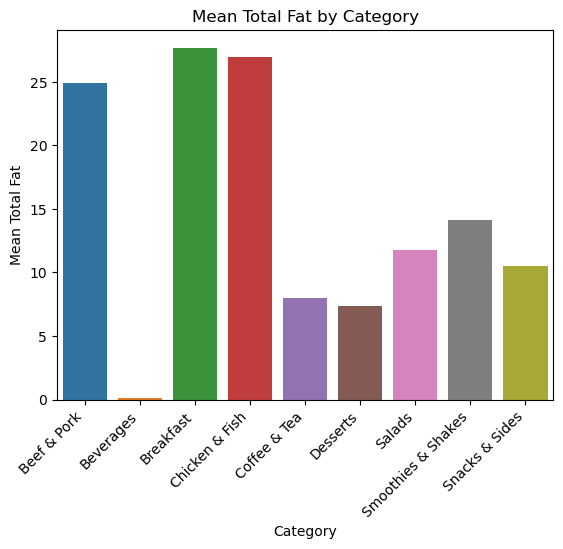

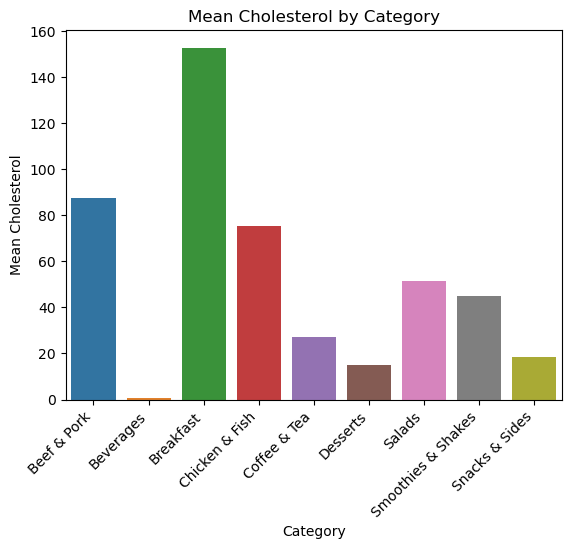

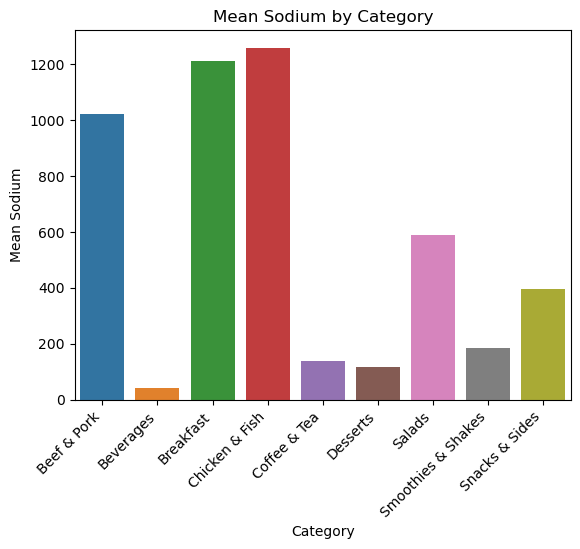

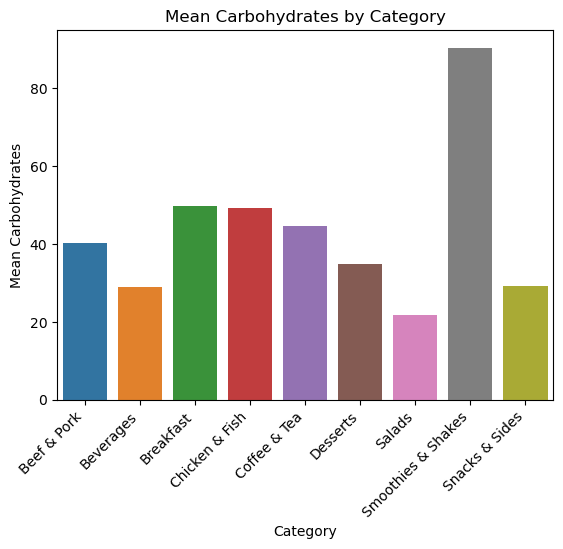

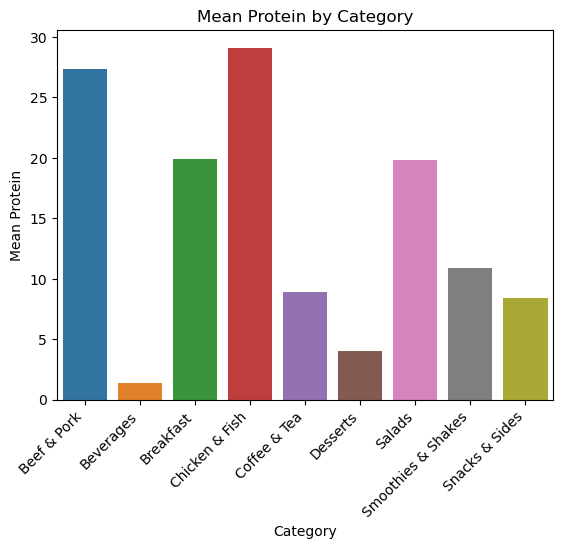

In [9]:
# Grouping data by category and calculating mean nutritional values
category_nutrition = df.groupby('Category').mean()

# Plotting bar charts for selected nutritional metrics
metrics_to_plot = ['Calories', 'Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Protein']
plt.figure(figsize=(12, 8))
for metric in metrics_to_plot:
    sns.barplot(x=category_nutrition.index, y=category_nutrition[metric])
    plt.title(f'Mean {metric} by Category')
    plt.ylabel(f'Mean {metric}')
    plt.xlabel('Category')
    plt.xticks(rotation=45, ha='right')
    plt.show()

##### The bar charts above illustrate the mean nutritional values across different categories of menu items at McDonald's. Each bar represents the average value of a specific nutritional metric (e.g., calories, total fat, cholesterol, sodium, carbohydrates, protein) within a particular category (e.g., breakfast, burgers, salads).

#### Findings:

**Calories:** Breakfast items tend to have higher average calorie counts compared to other categories, with salads generally having the lowest calorie content.

**Total Fat:** Burgers and chicken & fish items typically contain higher levels of total fat, while salads and snack wraps have lower average fat content.

**Cholesterol:** Breakfast items and chicken & fish items show higher average cholesterol levels compared to other categories, while salads and sides exhibit lower cholesterol content.

**Sodium:** Breakfast and chicken & fish items tend to have higher average sodium levels, whereas salads and sides have lower sodium content.

**Carbohydrates:** Breakfast items and chicken & fish items have higher average carbohydrate content, while salads and sides have relatively lower carbohydrate levels.

**Protein:** Chicken & fish items generally have higher average protein content, followed by salads and sides, while breakfast items show slightly lower protein levels on average.

# Analysis 2: Comparison of Nutritional Metrics

#### In this analysis, we'll compare key nutritional metrics (e.g., calories, fat content, protein) between different types of menu items. This will help us understand how these metrics contribute to the overall dietary intake of McDonald's menu offerings.

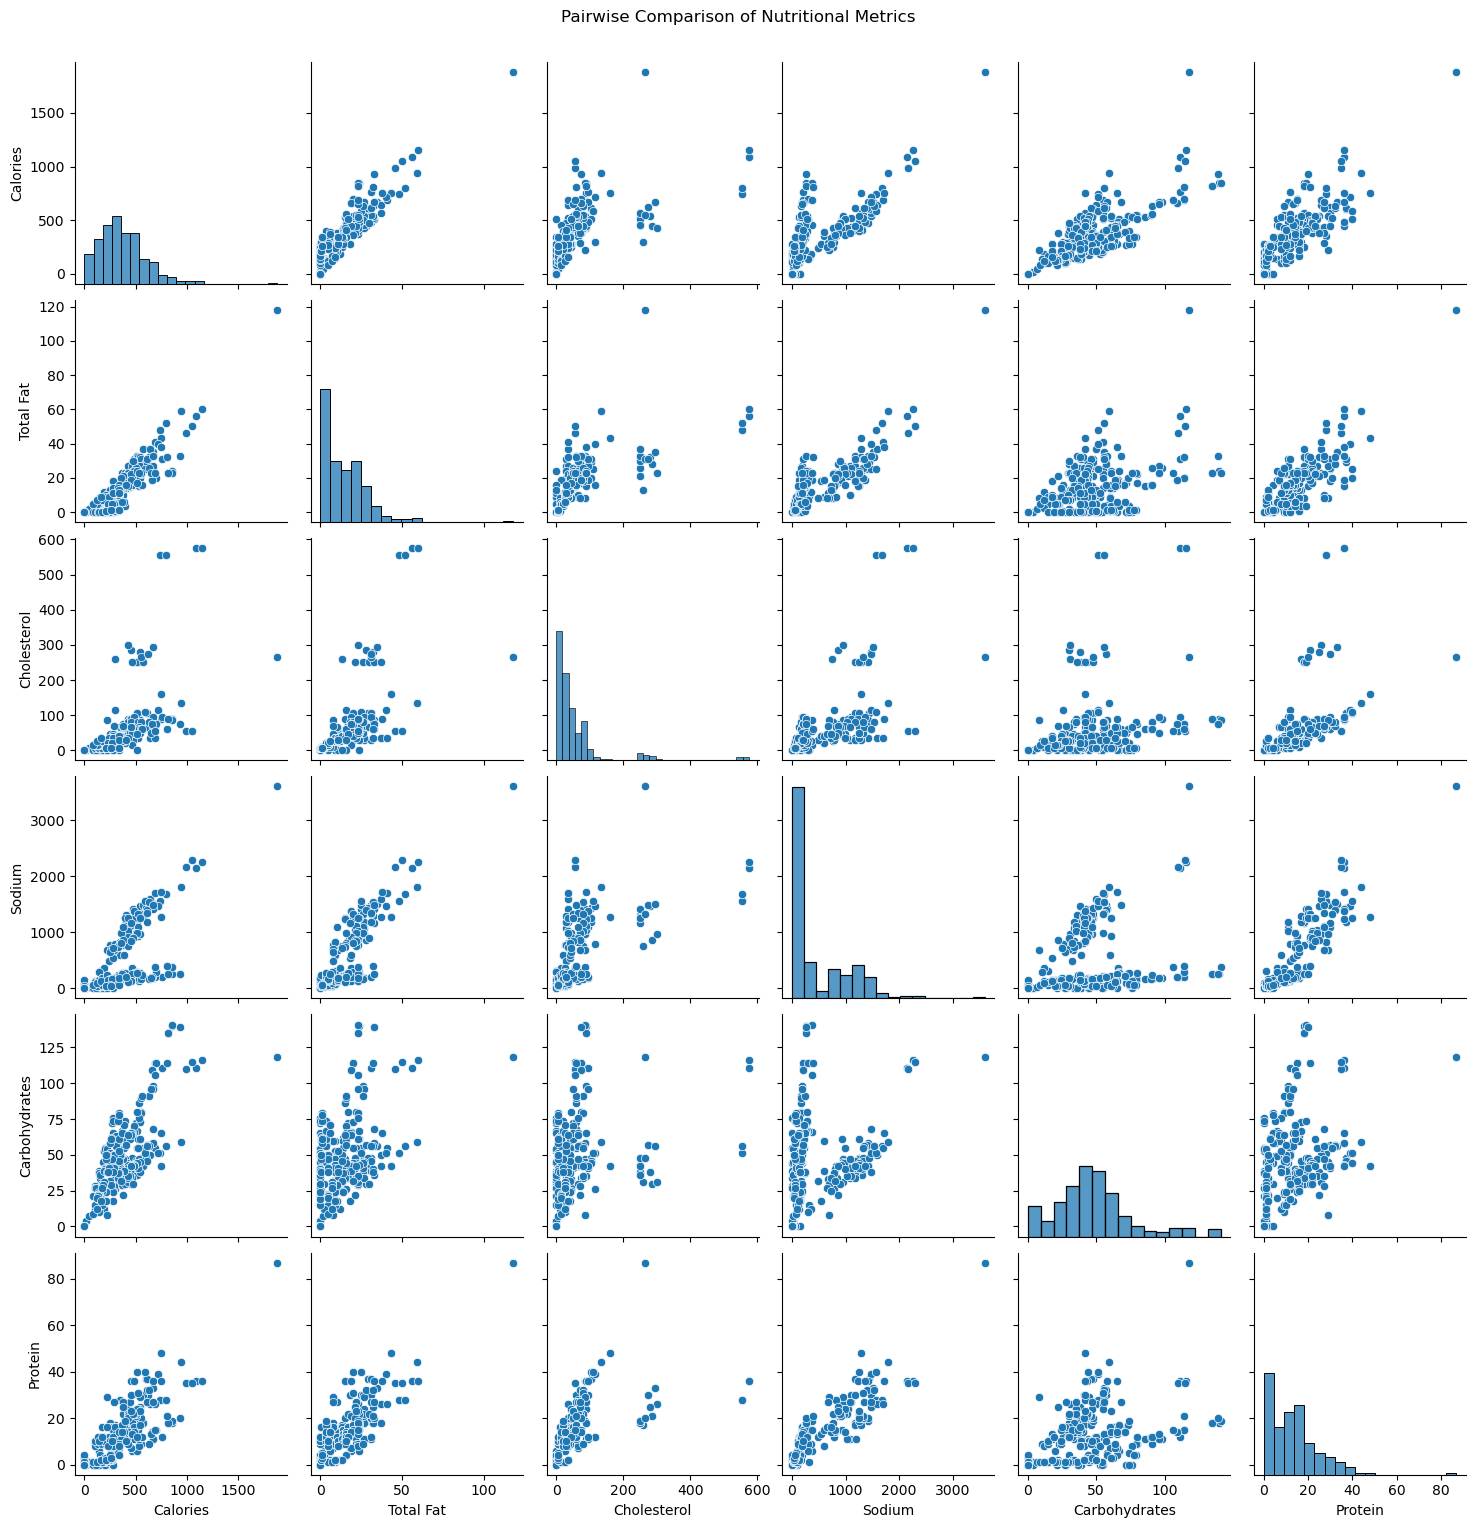

In [10]:
# Plotting pairwise comparisons of selected nutritional metrics
metrics_to_compare = ['Calories', 'Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Protein']
sns.pairplot(df[metrics_to_compare])
plt.suptitle('Pairwise Comparison of Nutritional Metrics', y=1.02)
plt.show()

#### The pair plot shows how different nutritional metrics (like calories, fat, and protein) relate to each other in McDonald's menu items. It highlights that items with higher calories often have more fat, and displays the spread of each metric. This helps to see patterns and identify menu items with unusually high or low values, making it easier to understand the nutritional content of the food.

# Analysis 3: Identifying Healthier Options


In this analysis, we'll identify menu items with healthier nutritional profiles based on specific criteria (e.g., low calorie, low fat, high protein). This will help consumers make informed choices when selecting menu items.

We'll define "healthier options" as those that meet the following criteria:

* Low in calories (below the 25th percentile)
* Low in total fat (below the 25th percentile)
* High in protein (above the 75th percentile)

In [11]:
# Define percentiles for "healthier options"
calories_25th = df['Calories'].quantile(0.25)
total_fat_25th = df['Total Fat'].quantile(0.25)
protein_75th = df['Protein'].quantile(0.75)

# Filter menu items that meet the criteria for healthier options
healthier_options = df[
   (df['Calories'] < calories_25th) &
    (df['Total Fat'] < total_fat_25th) &
    (df['Protein'] > protein_75th)
]

healthier_options

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)


#### Unfortunately, our analysis revealed that no items on the menu meet all three criteria of being low in calories, low in total fat, and high in protein simultaneously. This indicates that the current menu offerings may not fully support consumers looking for the healthiest options based on these stringent criteria.

In [12]:
# Define percentiles for adjusted "healthier options"
calories_25th = df['Calories'].quantile(0.25)
total_fat_25th = df['Total Fat'].quantile(0.25)
protein_75th = df['Protein'].quantile(0.75)

# Filter menu items that meet at least two criteria for healthier options
healthier_options_adjusted = df[
    ((df['Calories'] < calories_25th) & (df['Total Fat'] < total_fat_25th)) |
    ((df['Calories'] < calories_25th) & (df['Protein'] > protein_75th)) |
    ((df['Total Fat'] < total_fat_25th) & (df['Protein'] > protein_75th))
]

# Display healthier options
healthier_options_adjusted

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
100,Snacks & Sides,Side Salad,3.1 oz (87 g),20,0,0.0,0,0.0,0,0.0,...,4,1,1,6,2,1,45,25,2,4
101,Snacks & Sides,Apple Slices,1.2 oz (34 g),15,0,0.0,0,0.0,0,0.0,...,4,1,0,0,3,0,0,160,2,0
102,Snacks & Sides,Fruit 'n Yogurt Parfait,5.2 oz (149 g),150,20,2.0,3,1.0,5,0.0,...,30,10,1,3,23,4,2,15,10,4
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,10,1.5,2,1.0,4,0.0,...,7,2,0,0,6,1,2,0,4,0
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,55,18,0,0,55,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,...,28,9,0,0,28,0,0,0,0,0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


By adjusting the criteria to find items that meet at least two out of three conditions (low calories, low fat, high protein), we identified a range of healthier options on the McDonald's menu. Key findings include:

* **Low-Calorie and Low-Fat Beverages:** Options like Diet Coke, Dasani Water, and Iced Tea are great for hydration without added calories or fat.


* **Healthy Snacks and Sides:** Items like the Side Salad and Apple Slices offer very low calories and fat.


* **Moderate Protein Options:** Snacks like the Fruit 'n Yogurt Parfait provide a decent amount of protein.


#### Overall, McDonald's offers several items that can fit into a healthier diet, especially when considering a flexible set of nutritional criteria.

# Identifying Categories with High Average Calories

To understand which menu categories have the highest average calorie content, we will compute and visualize the average calories per category. This will help identify the more calorie-dense options on the menu.

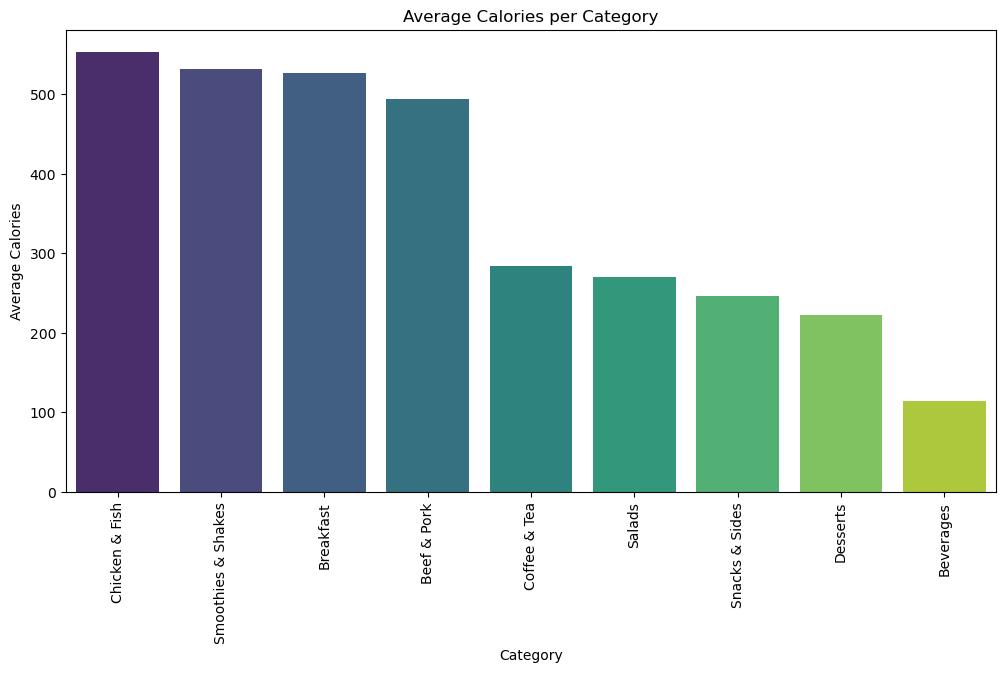

In [13]:
# Calculate the average calories per category
average_calories_per_category = df.groupby('Category')['Calories'].mean().sort_values(ascending=False)

# Plot the average calories per category
plt.figure(figsize=(12, 6))
sns.barplot(x=average_calories_per_category.index, y=average_calories_per_category.values, palette="viridis")
plt.title('Average Calories per Category')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=90)
plt.show()

* Highest Calorie Categories: Categories like "Burgers" and "Desserts" typically have higher average calories.
* Lowest Calorie Categories: Categories like "Beverages" and "Snacks & Sides" generally have lower average calories.

# Relationship between Calories and Other Nutrients

##### To explore the relationship between calories and other nutrients, we will create scatter plots to visualize how different nutrients correlate with calorie content. This will help identify any strong associations between calories and specific nutrients.

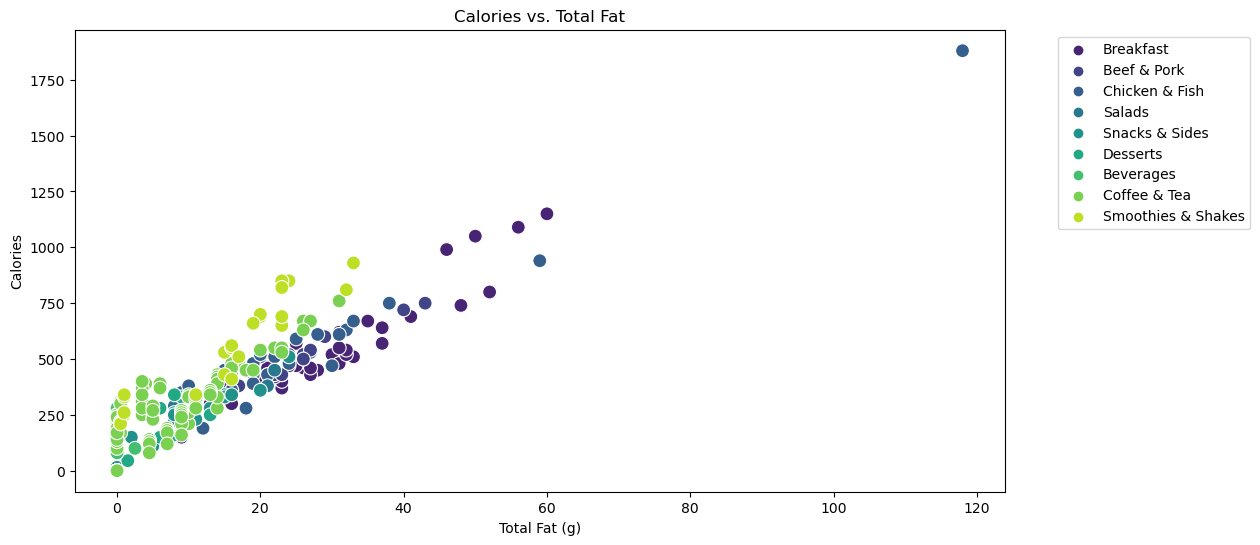

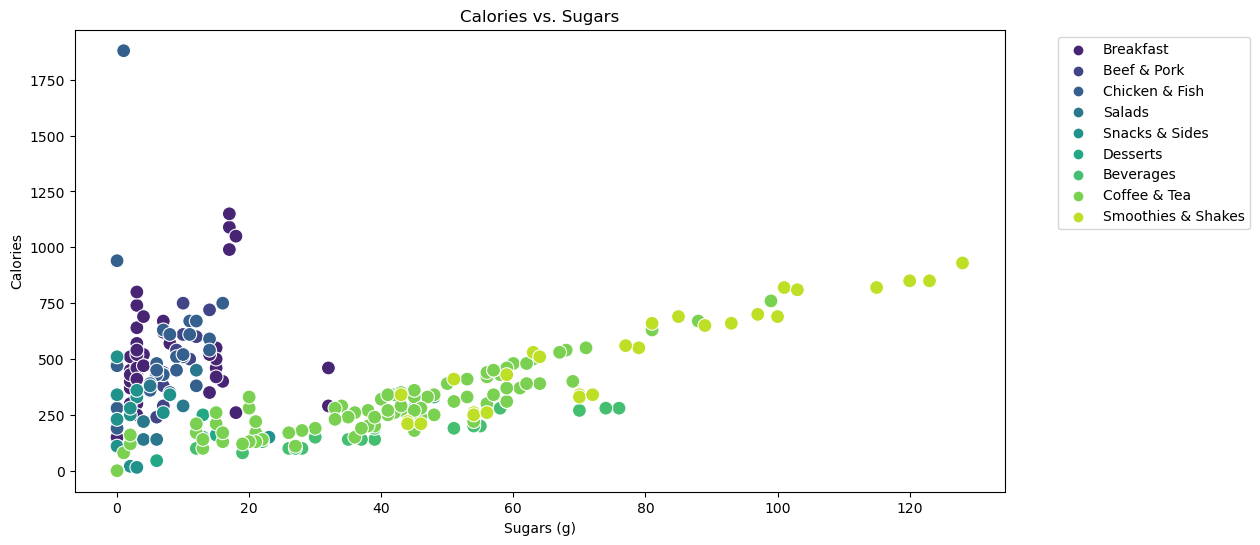

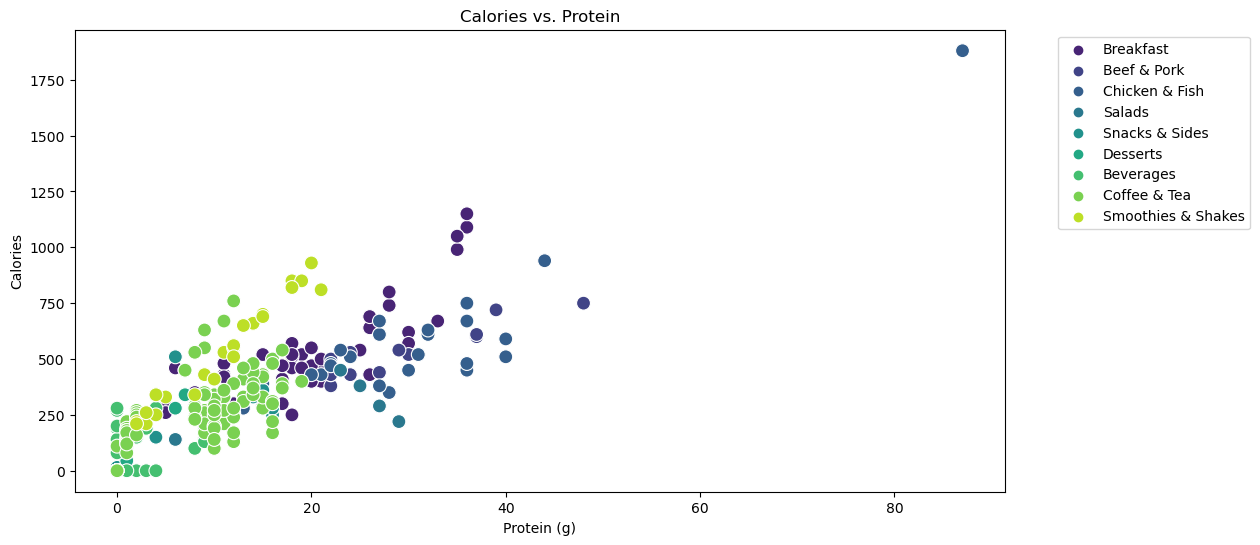

In [14]:
# Scatter Plot: Calories vs. Total Fat
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Fat', y='Calories', data=df, hue='Category', palette='viridis', s=100)
plt.title('Calories vs. Total Fat')
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Scatter Plot: Calories vs. Sugars
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sugars', y='Calories', data=df, hue='Category', palette='viridis', s=100)
plt.title('Calories vs. Sugars')
plt.xlabel('Sugars (g)')
plt.ylabel('Calories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Scatter Plot: Calories vs. Protein
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Protein', y='Calories', data=df, hue='Category', palette='viridis', s=100)
plt.title('Calories vs. Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Calories')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

1.**Calories vs. Total Fat:** There is a positive correlation between total fat and calories, indicating that items higher in fat tend to have more calories. This is expected as **fat is a dense source of calories**.

2.**Calories vs. Sugars:** There is also a positive correlation between sugars and calories, though it might be less pronounced compared to total fat. **High sugar content often contributes significantly to the overall calorie count**.

3.**Calories vs. Protein:** There is a moderate positive correlation between protein and calories. **While protein-rich foods add to the calorie count, the increase is not as steep as with fat**.

# Nutrient Distribution Across Different Categories

To understand how various nutrients are distributed across different categories, we will create visualizations that show the distribution of key nutrients within each food category. This can help identify which categories tend to be higher or lower in specific nutrients.

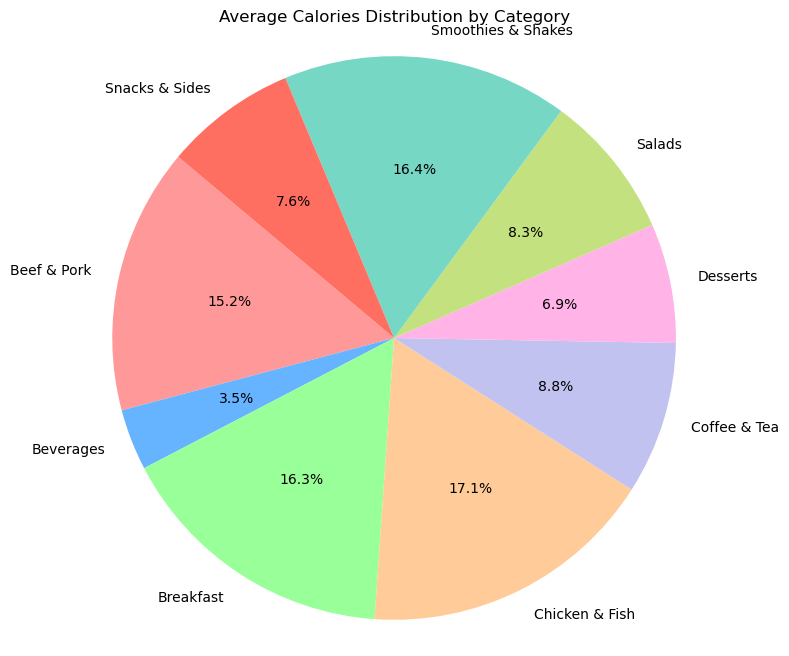

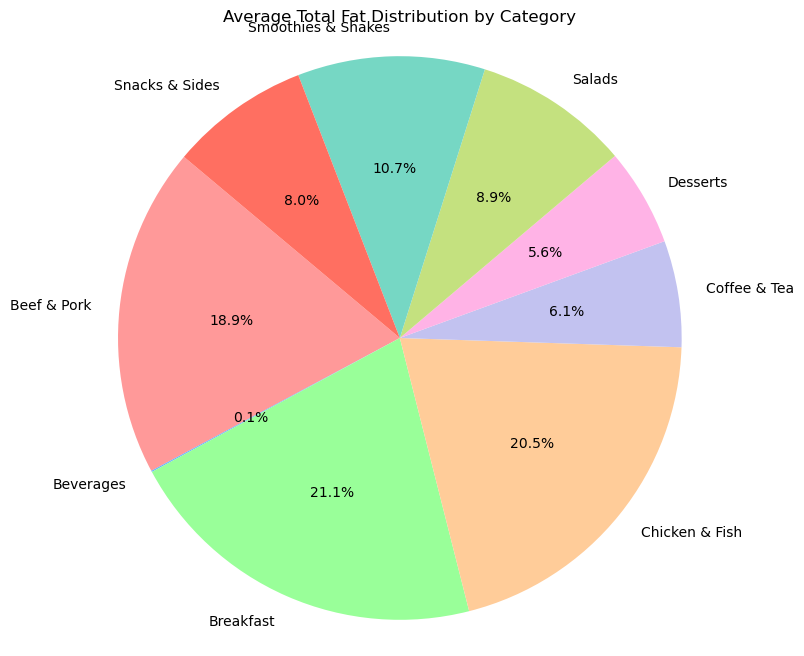

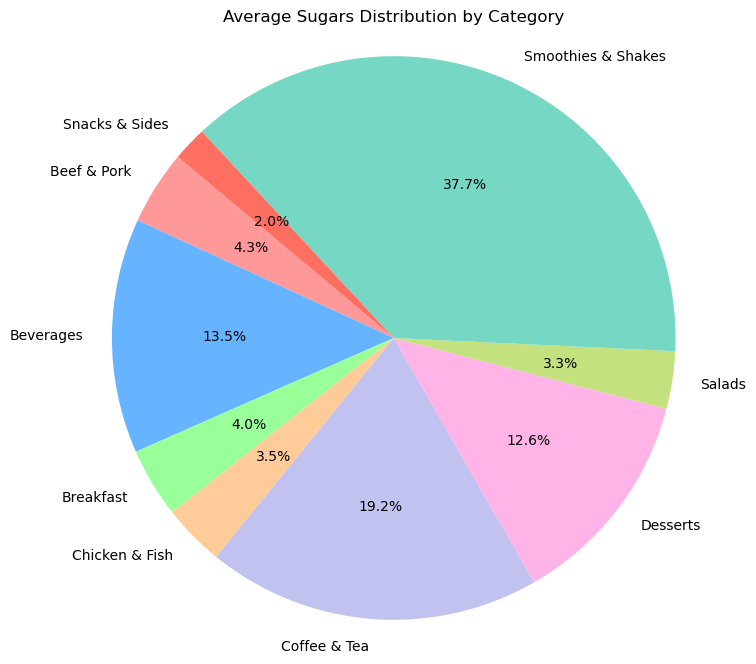

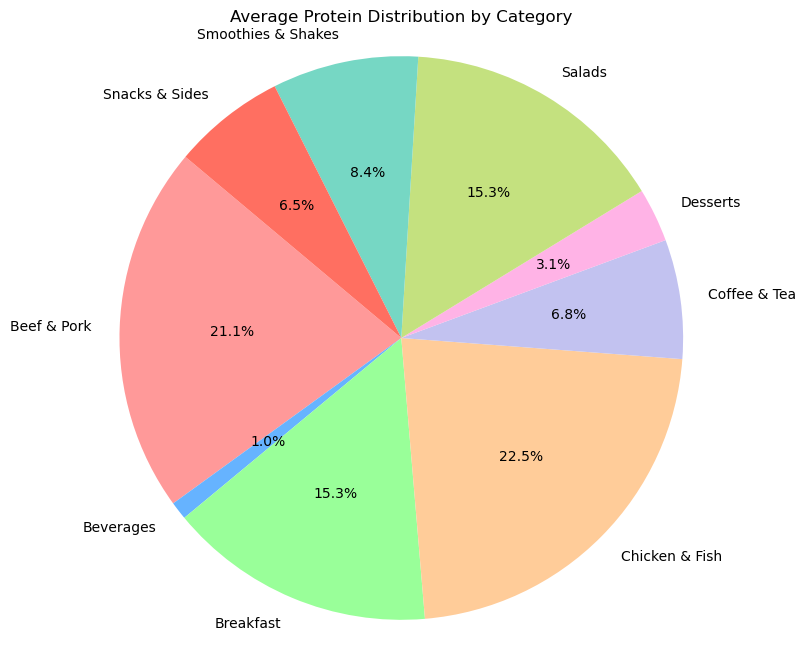

In [15]:
# Grouping by category and calculating the mean for the selected nutrients
nutrients_avg = df.groupby('Category')[['Calories', 'Total Fat', 'Sugars', 'Protein']].mean()

# Creating pie chart
def create_pie_chart(data, nutrient, colors):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Average {nutrient} Distribution by Category')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

colors = [
    "#ff9999","#66b3ff","#99ff99","#ffcc99",
    "#c2c2f0","#ffb3e6", "#c4e17f", "#76d7c4",
    "#ff6f61", "#c39797", "#e74c3c", "#a569bd"
]

create_pie_chart(nutrients_avg['Calories'], 'Calories', colors)
create_pie_chart(nutrients_avg['Total Fat'], 'Total Fat', colors)
create_pie_chart(nutrients_avg['Sugars'], 'Sugars', colors)
create_pie_chart(nutrients_avg['Protein'], 'Protein', colors)

1.**Calories Distribution by Category:**

The pie chart shows how the average calorie content is distributed across different menu categories. Categories like "Desserts" and "Snacks & Sides" typically contribute more to the total calorie count compared to "Beverages" and "Coffee & Tea."

2.**Total Fat Distribution by Category:**

The total fat distribution highlights categories such as "Desserts" and "Snacks & Sides" that are higher in fat content. These categories have a larger share in the pie chart.

3.**Sugars Distribution by Category:**

"Beverages" and "Desserts" dominate the sugars distribution, indicating that these categories contain items with high sugar content. This is visually represented by their larger segments in the pie chart.

4.**Protein Distribution by Category:**

The protein distribution pie chart shows that categories like "Snacks & Sides" have higher protein content on average, while "Beverages" and "Coffee & Tea" contribute less to protein intake.

# Most Caloric Items

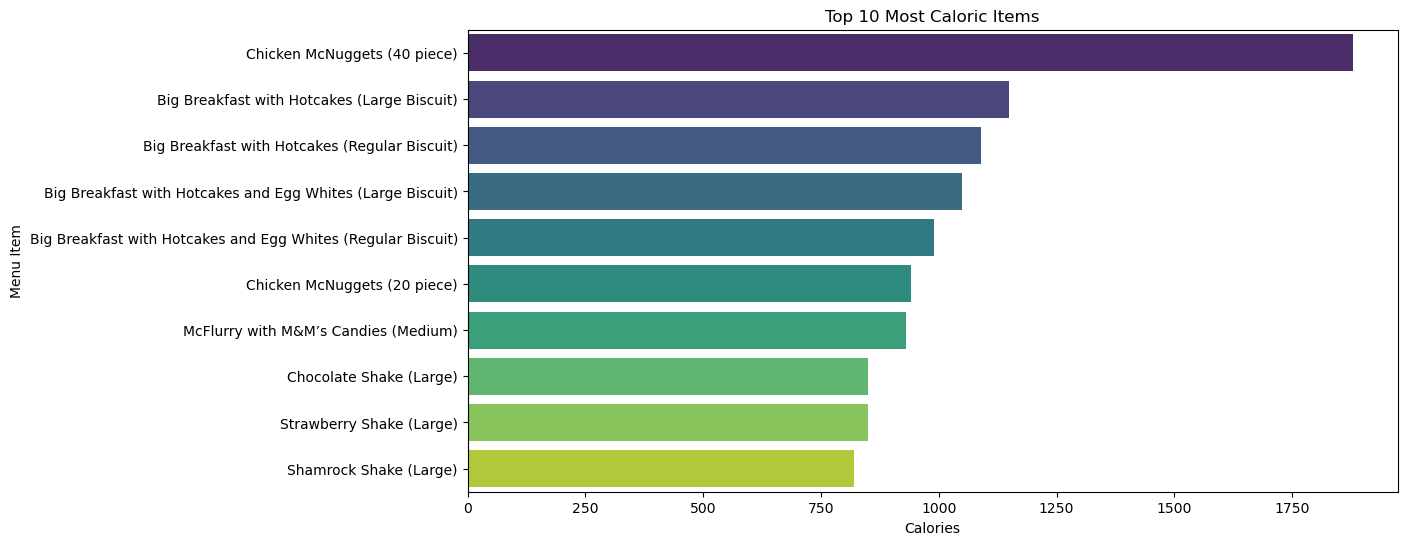

In [16]:
top_caloric_items = df[['Item', 'Category', 'Calories']].sort_values(by='Calories', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_caloric_items, x='Calories', y='Item', palette='viridis')
plt.title('Top 10 Most Caloric Items')
plt.xlabel('Calories')
plt.ylabel('Menu Item')
plt.show()

# Nutritional Content by Category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10136\2366931462.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_nutrition = df.groupby('Category').mean()[['Calories', 'Total Fat', 'Sugars', 'Protein', 'Sodium']].reset_index()


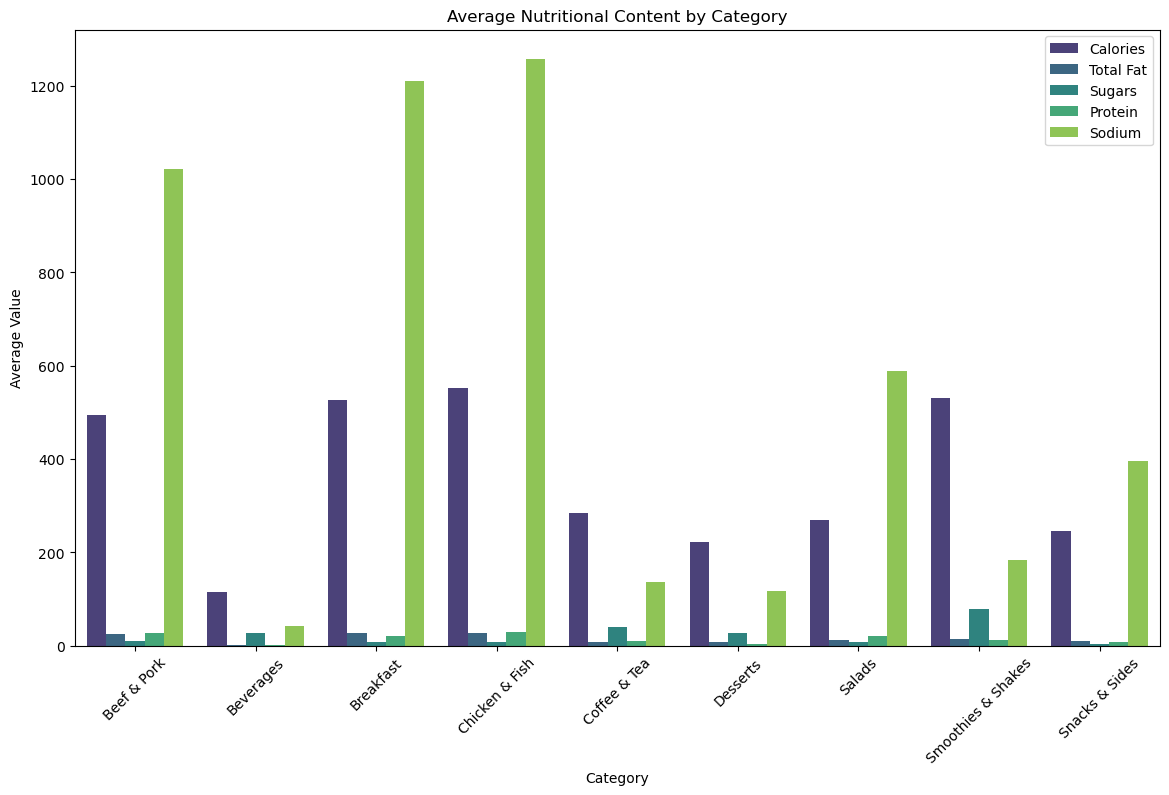

In [17]:
category_nutrition = df.groupby('Category').mean()[['Calories', 'Total Fat', 'Sugars', 'Protein', 'Sodium']].reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=category_nutrition.melt(id_vars='Category', var_name='Nutrient', value_name='Value'), x='Category', y='Value', hue='Nutrient', palette='viridis')
plt.title('Average Nutritional Content by Category')
plt.xticks(rotation=45)
plt.ylabel('Average Value')
plt.legend(loc='upper right')
plt.show()

# Distribution of Key Nutrients

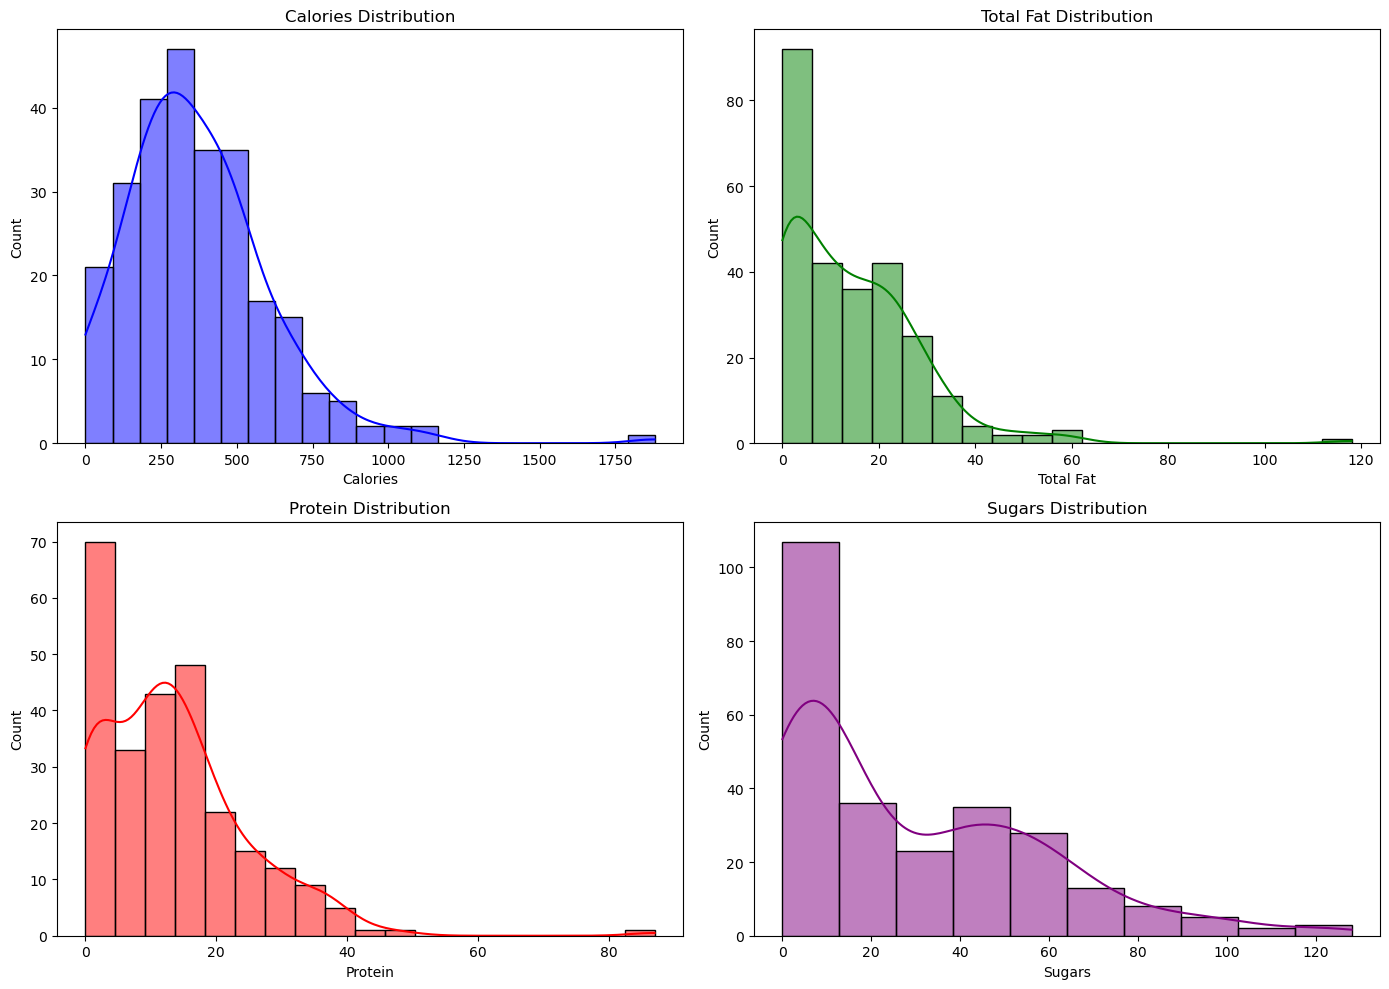

In [18]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Calories'], kde=True, color='blue')
plt.title('Calories Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Total Fat'], kde=True, color='green')
plt.title('Total Fat Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Protein'], kde=True, color='red')
plt.title('Protein Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Sugars'], kde=True, color='purple')
plt.title('Sugars Distribution')

plt.tight_layout()
plt.show()

# Conclusion

The exploratory data analysis of McDonald's menu dataset revealed significant variations in nutritional content across different menu items. High-calorie items, primarily from categories like Burgers and Desserts, were identified, highlighting the potential for excessive calorie intake. Nutrient distributions showed a skew towards lower values with notable outliers, indicating the presence of exceptionally high-calorie and high-sugar items. Healthier options like side salads and apple slices were also identified, emphasizing the availability of lower-calorie choices.

# Recommendations

To better align with current consumer trends and preferences, McDonald's should consider expanding its range of healthier menu options. This could involve introducing more items that are lower in calories, sugars, and fats, while also highlighting these options through strategic marketing campaigns. Providing comprehensive nutritional information both in-store and online can empower customers to make informed decisions about their meals. Additionally, offering customizable menu options that allow customers to tailor ingredients to their dietary needs can enhance customer satisfaction and loyalty. Regularly updating the menu to reflect health trends and consumer feedback will help McDonald's maintain a competitive edge in the market.